<a href="https://colab.research.google.com/github/tahminahasan/ML-Notebook/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1 =pd.read_csv("/content/Dhaka_Apartment_Dataset.csv")
df2 =pd.read_csv("/content/bproperty_data.csv")

In [5]:
df1.shape

(10580, 10)

In [6]:
df2.shape

(4704, 11)

In [7]:
df2.head()

,Unnamed: 0,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,0.0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300.0,23.86846,90.39280,Uttara,Sector 10
1,1.0,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456.0,23.81223,90.35967,Mirpur,Section 11
2,2.0,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550.0,23.75349,90.42469,Khilgaon,Chowdhuripara
3,3.0,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669.0,23.78855,90.40081,Banani,Road No 4
4,4.0,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835.0,23.76354,90.43180,Banasree,South Banasree Project


In [8]:
len(df2['Region'].unique())

69

In [9]:
df3=df2[['Price', 'Type', 'No. Beds', 'No. Baths', 'Area', 'Region']]
df3.head(1)

,Price,Type,No. Beds,No. Baths,Area,Region
0,7500000,Apartment,3.0,3.0,1300.0,Uttara


In [10]:
df4=df3.rename(columns={
    'No. Beds': 'Beds',
    'No. Baths' : 'Bath',
    'Area' : 'Size',
    'Region': 'Location'
})
df4.head(1)

,Price,Type,Beds,Bath,Size,Location
0,7500000,Apartment,3.0,3.0,1300.0,Uttara


In [11]:
#changing location
df5 = df4.iloc[: , [0,1,4,2,3,5]]
df5.head(1)

,Price,Type,Size,Beds,Bath,Location
0,7500000,Apartment,1300.0,3.0,3.0,Uttara


In [12]:
df5.dtypes

,0
Price,int64
Type,object
Size,float64
Beds,float64
Bath,float64
Location,object


In [13]:
df5.isnull().sum()

,0
Price,0
Type,0
Size,0
Beds,204
Bath,204
Location,0


In [14]:
df6 = df5.dropna()
df6.head(1)

,Price,Type,Size,Beds,Bath,Location
0,7500000,Apartment,1300.0,3.0,3.0,Uttara


In [15]:
df6.isnull().sum()

,0
Price,0
Type,0
Size,0
Beds,0
Bath,0
Location,0


In [16]:
df6.dtypes

,0
Price,int64
Type,object
Size,float64
Beds,float64
Bath,float64
Location,object


In [17]:
df6.head(1)

,Price,Type,Size,Beds,Bath,Location
0,7500000,Apartment,1300.0,3.0,3.0,Uttara


In [18]:
#change data type
df6.Beds = df6.Beds.astype(int)
df6.Bath = df6.Bath.astype(int)

<ipython-input-18-5466869d7bc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.Beds = df6.Beds.astype(int)
<ipython-input-18-5466869d7bc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.Bath = df6.Bath.astype(int)


In [19]:
df6.dtypes

,0
Price,int64
Type,object
Size,float64
Beds,int64
Bath,int64
Location,object


In [20]:
df1.head(1)

,Unnamed: 0,price,size_in_sqf,number_of_bath,number_of_bed,full_location,location_area,purpose_of_listing,type_of_listing,completion_status
0,0,19000000.0,2350.0,4,3,"Block B, Bashundhara R-A, Dhaka",Bashundhara R-A,For Sale,Apartment,Ready


In [21]:
df7 = df1[['price', 'size_in_sqf',	'number_of_bath', 'number_of_bed', 'location_area' ,'type_of_listing' ]]
df7.head(1)

,price,size_in_sqf,number_of_bath,number_of_bed,location_area,type_of_listing
0,19000000.0,2350.0,4,3,Bashundhara R-A,Apartment


In [22]:
df8= df7.rename(columns={
    'price': 'Price',
    'size_in_sqf' : 'Size',
    'number_of_bath': 'Bath',
    'number_of_bed': 'Beds',
    'location_area': 'Location',
    'type_of_listing' : 'Type'
})
df8.head(1)

,Price,Size,Bath,Beds,Location,Type
0,19000000.0,2350.0,4,3,Bashundhara R-A,Apartment


In [23]:
df9=df8.iloc[:,[0,5,1,3,2,4]]
df9.head(1)

,Price,Type,Size,Beds,Bath,Location
0,19000000.0,Apartment,2350.0,3,4,Bashundhara R-A


In [24]:
df6.head(1)

,Price,Type,Size,Beds,Bath,Location
0,7500000,Apartment,1300.0,3,3,Uttara


In [25]:
df9.dtypes

,0
Price,float64
Type,object
Size,float64
Beds,int64
Bath,int64
Location,object


In [26]:
df6.dtypes

,0
Price,int64
Type,object
Size,float64
Beds,int64
Bath,int64
Location,object


In [27]:
df9.Price = df9.Price.astype(int)
df9.dtypes

,0
Price,int64
Type,object
Size,float64
Beds,int64
Bath,int64
Location,object


In [28]:
df10 = pd.concat ([df9,df6], axis = 0)
df10.head(1)

,Price,Type,Size,Beds,Bath,Location
0,19000000,Apartment,2350.0,3,4,Bashundhara R-A


In [29]:
df10.shape

(15080, 6)

In [30]:
df10[df10.Beds>40]

,Price,Type,Size,Beds,Bath,Location
747,32500000,Building,12600.0,48,10,Badda
1226,67000000,Building,20685.0,56,10,Dakshin Khan
2237,65000000,Building,22400.0,49,10,Demra
2681,115000000,Building,17600.0,42,10,Aftab Nagar
2687,40000000,Building,21600.0,75,10,Savar
3657,230000000,Building,28000.0,48,10,Kathalbagan
4489,50000000,Building,20300.0,56,10,Bangshal
6846,36000000,Building,8880.0,48,10,Mugdapara
7797,75000000,Building,19200.0,46,10,Mirpur
8111,200000000,Building,6300.0,47,10,Dhanmondi


In [31]:
df10.to_csv('Dhaka_apartment_clean_DS.csv', index =False)

In [32]:
df11=pd.read_csv('/content/Dhaka_apartment_clean_DS.csv')
df11.head(2)

,Price,Type,Size,Beds,Bath,Location
0,19000000,Apartment,2350.0,3,4,Bashundhara R-A
1,33000000,Apartment,2294.0,3,4,Gulshan


In [33]:
df11['Price_per_sqf'] = (df11.Price / df11.Size).astype(int)
df11.head(5)

,Price,Type,Size,Beds,Bath,Location,Price_per_sqf
0,19000000,Apartment,2350.0,3,4,Bashundhara R-A,8085
1,33000000,Apartment,2294.0,3,4,Gulshan,14385
2,13500000,Apartment,1745.0,3,3,Bashundhara R-A,7736
3,5300000,Apartment,1080.0,3,2,Hazaribag,4907
4,25000000,Apartment,1920.0,3,3,Banani,13020


In [34]:
df11.Type.value_counts()

,count
Type,
Apartment,14871
Building,153
Duplex,55
Plot,1


In [35]:
#dropping other three except Apartment
df12 = df11[df11.Type == 'Apartment']
df12.Type.value_counts()

,count
Type,
Apartment,14871


In [36]:
print(df12.Price_per_sqf.median())
print(df12.Price_per_sqf.mean())
print(df12.Price_per_sqf.std())
print(df12.Price_per_sqf.max())
print(df12.Price_per_sqf.min())

5581.0
6280.627126622285
2639.160952076053
30000
416


In [37]:
info = df12.copy()
info.head(1)

,Price,Type,Size,Beds,Bath,Location,Price_per_sqf
0,19000000,Apartment,2350.0,3,4,Bashundhara R-A,8085


In [38]:
info.sort_values ('Price_per_sqf',ascending= False)


,Price,Type,Size,Beds,Bath,Location,Price_per_sqf
14068,81000000,Apartment,2700.0,4,4,Baridhara,30000
3318,120000000,Apartment,4200.0,3,3,Gulshan,28571
3980,170000000,Apartment,5950.0,3,4,Gulshan,28571
1452,150000000,Apartment,5345.0,4,4,Gulshan,28063
1333,140000000,Apartment,5127.0,4,4,Baridhara,27306
...,...,...,...,...,...,...,...
3800,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
3793,2200000,Apartment,1235.0,3,3,Mohammadpur,1781
2005,2200000,Apartment,1235.0,3,3,Mohammadpur,1781
11229,12000000,Apartment,15000.0,3,3,BashundharaR-A,800


In [39]:
#Groups info by Location
info.groupby('Location').Price_per_sqf.mean().sort_values(ascending=True)

,Price_per_sqf
Location,
Dumni,2577.500000
Zafrabad,3401.000000
Savar,3529.826923
UttarKhan,3680.500000
Demra,3820.000000
...,...
Mohakhali DOHS,13914.888889
MohakhaliDOHS,14779.000000
BananiDOHS,15932.500000


In [40]:
len(df12.Location.unique())

80

In [41]:
df12.Location = df12.Location.str.replace(" ", "")

<ipython-input-41-62305c9a0930>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12.Location = df12.Location.str.replace(" ", "")


In [42]:
len(df12.Location.unique())

69

In [43]:
#The .copy() operation freezes the current state of df12 into info, meaning info now reflects df12 after spaces were removed.
info=df12.copy()

In [44]:
info.groupby('Location').Price_per_sqf.mean().sort_values(ascending=True)

,Price_per_sqf
Location,
Dumni,2577.500000
Zafrabad,3401.000000
Savar,3529.826923
Demra,3820.000000
Shyampur,3826.773723
...,...
Baridhara,12923.547945
Banani,13421.452555
MohakhaliDOHS,14038.333333


In [45]:
len(df12.Location.unique())

69

In [46]:
#.agg() function is used to apply multiple aggregation functions at once
info.groupby('Location').Price_per_sqf.agg(['mean', 'median', 'max', 'min']).sort_values(by = 'mean', ascending=False)

,mean,median,max,min
Location,,,,
BananiDOHS,16728.913043,16666.0,23200,12013
Gulshan,16234.144279,15421.0,28571,8928
MohakhaliDOHS,14038.333333,13818.0,17857,10000
Banani,13421.452555,13095.0,21428,7985
Baridhara,12923.547945,10091.0,30000,6675
...,...,...,...,...
Shyampur,3826.773723,4000.0,5138,2589
Demra,3820.000000,3809.0,5711,2608
Savar,3529.826923,3333.0,5777,2242


<Axes: xlabel='Location', ylabel='mean'>

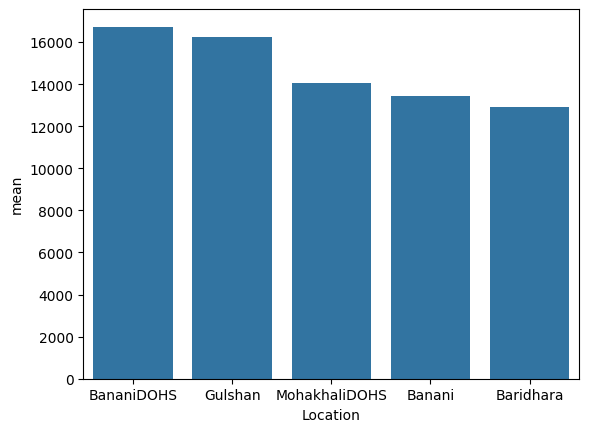

In [47]:
top5 = info.groupby('Location').Price_per_sqf.agg(['mean', 'median', 'max', 'min']).sort_values(by = 'mean', ascending=False).head(5)
sns.barplot(data=top5, x='Location', y='mean')

<Axes: xlabel='Location', ylabel='mean'>

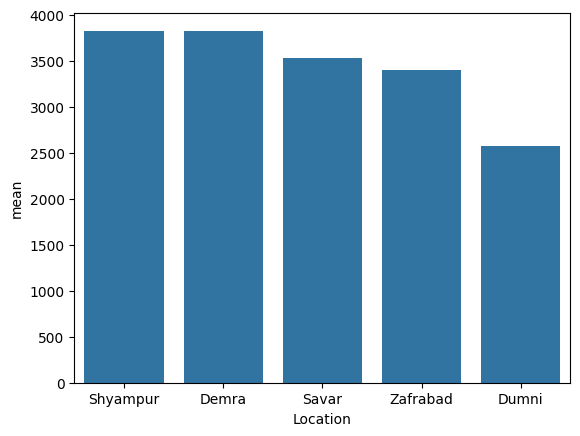

In [48]:
least5 = info.groupby('Location').Price_per_sqf.agg(['mean', 'median', 'max', 'min']).sort_values(by = 'mean', ascending=False).tail(5)
sns.barplot(data=least5, x='Location', y='mean')

In [49]:
df13=df12.copy()
df13.head(1)

,Price,Type,Size,Beds,Bath,Location,Price_per_sqf
0,19000000,Apartment,2350.0,3,4,BashundharaR-A,8085


In [50]:
location_count= df13.groupby('Location').Location.count()
location_count[location_count<=10]

,Location
Location,
Banglamotors,1
Dumni,10
Kakrail,3
Nadda,7
Shahbagh,2
Taltola,3
Zafrabad,3


In [51]:
location_less_than_10 = location_count[location_count<=10]
df13.Location = df13.Location.apply(lambda x : 'other' if x in location_less_than_10 else x)
len(df13.Location.unique())
#If x (the location) is found in location_less_than_10, then it is replaced with 'other' else unchanged

63

In [52]:
df13.shape

(14871, 7)

In [53]:
df14=df13.copy()

In [54]:
def remove_price_outlier(df):
    df_output = pd.DataFrame()
    for index, subdf in df.groupby('Location'):
        m = np.mean(subdf.Price_per_sqf)
        st = np.std(subdf.Price_per_sqf)
        ## Keep only the rows where Price_per_sqf is within 2 standard deviations of the average price
        reduce_df = subdf[(subdf.Price_per_sqf >= (m-2*st)) & (subdf.Price_per_sqf <= (m+2*st))]
        # Add the filtered rows (reduce_df) to the final output (df_output) and reset the index
        df_output = pd.concat([df_output, reduce_df], ignore_index=True)
    return df_output

df15 = remove_price_outlier(df14)
df15.shape

(14188, 7)

In [55]:
print(df14.Price_per_sqf.describe())

count    14871.000000
mean      6280.627127
std       2639.160952
min        416.000000
25%       4615.000000
50%       5581.000000
75%       7087.000000
max      30000.000000
Name: Price_per_sqf, dtype: float64


In [56]:
print(df15.Price_per_sqf.describe())

count    14188.000000
mean      6100.993798
std       2377.120893
min       1781.000000
25%       4591.000000
50%       5500.000000
75%       6934.000000
max      23809.000000
Name: Price_per_sqf, dtype: float64


In [57]:
df15[df15.Price_per_sqf <= 2000]

,Price,Type,Size,Beds,Bath,Location,Price_per_sqf
10180,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
10181,2200000,Apartment,1235.0,3,3,Mohammadpur,1781
10331,2200000,Apartment,1235.0,3,3,Mohammadpur,1781
10332,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
10333,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
10334,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
10335,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
10336,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
10337,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
10338,2300000,Apartment,1235.0,3,3,Mohammadpur,1862


In [58]:
df15[df15.Location == 'Mohammadpur'].Price_per_sqf.mean()

5005.524324324324

In [59]:
df16=df15.copy()
df16.head(1)

,Price,Type,Size,Beds,Bath,Location,Price_per_sqf
0,9300000,Apartment,1450.0,3,3,Adabor,6413


In [60]:
df17 = df16.drop(['Type', 'Price_per_sqf'], axis=1)
df17.head(1)

,Price,Size,Beds,Bath,Location
0,9300000,1450.0,3,3,Adabor


In [61]:
df17.to_csv('clean_apartment.csv', index=False)

In [62]:
df18 = pd.read_csv("/content/clean_apartment.csv")
df18.head(1)

,Price,Size,Beds,Bath,Location
0,9300000,1450.0,3,3,Adabor


In [63]:
#For each unique value in the Location column, pd.get_dummies() creates a new column.
location_dummy = pd.get_dummies(df18.Location)
location_dummy

,Adabor,AftabNagar,Agargaon,Badda,Banani,BananiDOHS,Banasree,Bangshal,Baridhara,BaridharaDOHS,...,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,UttarKhan,Uttara,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
14184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
14185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
14186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [64]:
df19=pd.concat([df18, location_dummy], axis=1)
df19.head(1)

,Price,Size,Beds,Bath,Location,Adabor,AftabNagar,Agargaon,Badda,Banani,...,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,UttarKhan,Uttara,other
0,9300000,1450.0,3,3,Adabor,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
df20 = df19.drop(['Location'], axis=1)
df20.head(1)

,Price,Size,Beds,Bath,Adabor,AftabNagar,Agargaon,Badda,Banani,BananiDOHS,...,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,UttarKhan,Uttara,other
0,9300000,1450.0,3,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
df20.dtypes

,0
Price,int64
Size,float64
Beds,int64
Bath,int64
Adabor,bool
...,...
Tejgaon,bool
Turag,bool
UttarKhan,bool
Uttara,bool


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [68]:
x=df20.drop(['Price'],axis=1)
y=df20.Price

In [69]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [70]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(11350, 66)
(11350,)
(2838, 66)
(2838,)


In [71]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [72]:
model.score(x_test, y_test)

0.8759081624937967

In [73]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [74]:
#n_splits=5 means that the data will be split into training and testing sets 5 times
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.88583827, 0.87341293, 0.88371206, 0.87923748, 0.87473791])

In [75]:
def predict_price(size, bed, bath, location):
    loc_index = np.where(x.columns==location)[0][0]
    result = np.zeros(len(x.columns))
    result[0] = size
    result[1] = bed
    result[2] = bath
    if loc_index >=0:
      result[loc_index] = 1

    return model.predict([result])[0]

In [76]:
predict_price(1850, 5, 3, "Adabor")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


11224483.632002316

In [77]:
x.head(1)

,Size,Beds,Bath,Adabor,AftabNagar,Agargaon,Badda,Banani,BananiDOHS,Banasree,...,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,UttarKhan,Uttara,other
0,1450.0,3,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
